In [121]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib
import matplotlib.pyplot as plt

import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots as sp

In [185]:
dataset = pd.read_csv('ENCH470_YeastDataSet.csv')
Yeastdata = dataset.iloc[:,:7]
Yeastdata

,T (C),pH,DO (%),Glucose,Maltodextrin,Sugar Concentration (g/L),mu-max (1/hr)
0,5.0,5.0,0,1,0,15.0,0.008
1,10.0,5.0,0,1,0,15.0,0.030
2,15.0,5.0,0,1,0,15.0,0.068
3,18.5,5.0,0,1,0,15.0,0.115
4,22.5,5.0,0,1,0,15.0,0.167
5,26.3,5.0,0,1,0,15.0,0.250
6,30.0,5.0,0,1,0,15.0,0.319
7,31.0,5.0,0,1,0,15.0,0.379
8,33.0,5.0,0,1,0,15.0,0.309
9,34.0,5.0,0,1,0,15.0,0.258


In [123]:
#Separating the Features and Label

YeastFeatures = Yeastdata.iloc[:,:6]
YeastLabels = Yeastdata['mu-max (1/hr)']

YeastFeatures

,T (C),pH,DO (%),Glucose,Maltodextrin,Sugar Concentration (g/L)
0,5.0,5.0,0,1,0,15.0
1,10.0,5.0,0,1,0,15.0
2,15.0,5.0,0,1,0,15.0
3,18.5,5.0,0,1,0,15.0
4,22.5,5.0,0,1,0,15.0
5,26.3,5.0,0,1,0,15.0
6,30.0,5.0,0,1,0,15.0
7,31.0,5.0,0,1,0,15.0
8,33.0,5.0,0,1,0,15.0
9,34.0,5.0,0,1,0,15.0


In [124]:
pd.DataFrame(YeastLabels)

,mu-max (1/hr)
0,0.008
1,0.030
2,0.068
3,0.115
4,0.167
5,0.250
6,0.319
7,0.379
8,0.309
9,0.258


In [136]:
X = YeastFeatures  #Features
y = YeastLabels    #Label

#Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_regressor.fit(X_train, y_train)

# Predict on the test data
y_predTest = rf_regressor.predict(X_test)
y_predTrain = rf_regressor.predict(X_train)

# Evaluate the model
rmse_Test = mean_squared_error(y_test, y_predTest,squared= False)
r2_Test = r2_score(y_test, y_predTest)

rmse_Train = mean_squared_error(y_train, y_predTrain,squared= False)
r2_Train = r2_score(y_train, y_predTrain)

print("Test Root Mean Squared Error:", rmse_Test)
print("Test R^2 Score:", r2_Test)
print("Train Root Mean Squared Error:", rmse_Train)
print("Train R^2 Score:", r2_Train)

Test Root Mean Squared Error: 0.07354458729233565
Test R^2 Score: 0.6518856182228232
Train Root Mean Squared Error: 0.013345833543581058
Train R^2 Score: 0.9898673115254946


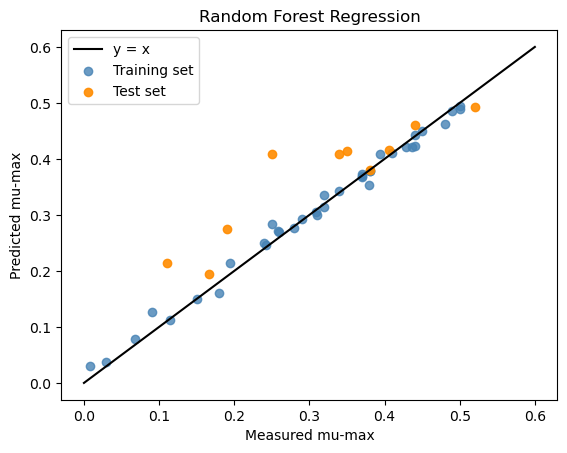

In [156]:
fig, parityPlot = plt.subplots()

# Plot a diagonal line
parityPlot.plot(np.linspace(0, 0.6, 10), np.linspace(0, 0.6, 10), color='black', label='y = x')

# Scatter plot for training set predictions
parityPlot.scatter(x=y_train,
                   y=y_predTrain,
                   color='steelblue', alpha=0.8
                   ,label='Training set')

# Scatter plot for test set predictions
parityPlot.scatter(x=y_test,
                   y=y_predTest,
                   color='darkorange', alpha=0.9
                   ,label='Test set')
                

# Graph labels
parityPlot.set_title('Random Forest Regression')
parityPlot.set_xlabel('Measured mu-max')
parityPlot.set_ylabel('Predicted mu-max')
parityPlot.legend()

fig.savefig('parity_plot.png')
plt.show()

# Changing the Number of Decision Trees

# 50 Trees

In [163]:
# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=50, random_state=42)

# Fit the model on the training data
rf_regressor.fit(X_train, y_train)

# Predict on the test data
y_predTest = rf_regressor.predict(X_test)
y_predTrain = rf_regressor.predict(X_train)

# Evaluate the model
rmse_Test = mean_squared_error(y_test, y_predTest,squared= False)
r2_Test = r2_score(y_test, y_predTest)

rmse_Train = mean_squared_error(y_train, y_predTrain,squared= False)
r2_Train = r2_score(y_train, y_predTrain)

print("Test Root Mean Squared Error:", rmse_Test)
print("Test R^2 Score:", r2_Test)
print("Train Root Mean Squared Error:", rmse_Train)
print("Train R^2 Score:", r2_Train)

Test Root Mean Squared Error: 0.0723005762079391
Test R^2 Score: 0.663562767096767
Train Root Mean Squared Error: 0.01462543175615865
Train R^2 Score: 0.9878311181497108


# 500 Trees

In [169]:
# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=500, random_state=42)

# Fit the model on the training data
rf_regressor.fit(X_train, y_train)

# Predict on the test data
y_predTest = rf_regressor.predict(X_test)
y_predTrain = rf_regressor.predict(X_train)

# Evaluate the model
rmse_Test = mean_squared_error(y_test, y_predTest,squared= False)
r2_Test = r2_score(y_test, y_predTest)

rmse_Train = mean_squared_error(y_train, y_predTrain,squared= False)
r2_Train = r2_score(y_train, y_predTrain)

print("Test Root Mean Squared Error:", rmse_Test)
print("Test R^2 Score:", r2_Test)
print("Train Root Mean Squared Error:", rmse_Train)
print("Train R^2 Score:", r2_Train)

Test Root Mean Squared Error: 0.0768685600723727
Test R^2 Score: 0.6197072666024795
Train Root Mean Squared Error: 0.012719669365072147
Train R^2 Score: 0.9907958237173753


# 25 Trees

In [179]:
# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=25, random_state=42)

# Fit the model on the training data
rf_regressor.fit(X_train, y_train)

# Predict on the test data
y_predTest = rf_regressor.predict(X_test)
y_predTrain = rf_regressor.predict(X_train)

# Evaluate the model
rmse_Test = mean_squared_error(y_test, y_predTest,squared= False)
r2_Test = r2_score(y_test, y_predTest)

rmse_Train = mean_squared_error(y_train, y_predTrain,squared= False)
r2_Train = r2_score(y_train, y_predTrain)

print("Test Root Mean Squared Error:", rmse_Test)
print("Test R^2 Score:", r2_Test)
print("Train Root Mean Squared Error:", rmse_Train)
print("Train R^2 Score:", r2_Train)

Test Root Mean Squared Error: 0.07631035788148292
Test R^2 Score: 0.6252104130410155
Train Root Mean Squared Error: 0.01495443891435727
Train R^2 Score: 0.987277468663941


# 60 Trees

In [180]:
# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=60, random_state=42)

# Fit the model on the training data
rf_regressor.fit(X_train, y_train)

# Predict on the test data
y_predTest = rf_regressor.predict(X_test)
y_predTrain = rf_regressor.predict(X_train)

# Evaluate the model
rmse_Test = mean_squared_error(y_test, y_predTest,squared= False)
r2_Test = r2_score(y_test, y_predTest)

rmse_Train = mean_squared_error(y_train, y_predTrain,squared= False)
r2_Train = r2_score(y_train, y_predTrain)

print("Test Root Mean Squared Error:", rmse_Test)
print("Test R^2 Score:", r2_Test)
print("Train Root Mean Squared Error:", rmse_Train)
print("Train R^2 Score:", r2_Train)

Test Root Mean Squared Error: 0.07179523912566292
Test R^2 Score: 0.668249315130992
Train Root Mean Squared Error: 0.014595990903342269
Train R^2 Score: 0.9878800605229997


# Changing Test Size

In [181]:
#Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_regressor.fit(X_train, y_train)

# Predict on the test data
y_predTest = rf_regressor.predict(X_test)
y_predTrain = rf_regressor.predict(X_train)

# Evaluate the model
rmse_Test = mean_squared_error(y_test, y_predTest,squared= False)
r2_Test = r2_score(y_test, y_predTest)

rmse_Train = mean_squared_error(y_train, y_predTrain,squared= False)
r2_Train = r2_score(y_train, y_predTrain)

print("Test Root Mean Squared Error:", rmse_Test)
print("Test R^2 Score:", r2_Test)
print("Train Root Mean Squared Error:", rmse_Train)
print("Train R^2 Score:", r2_Train)

Test Root Mean Squared Error: 0.050788425723780804
Test R^2 Score: 0.8152066109000599
Train Root Mean Squared Error: 0.019950748051792103
Train R^2 Score: 0.9802061189446554


In [182]:
#Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_regressor.fit(X_train, y_train)

# Predict on the test data
y_predTest = rf_regressor.predict(X_test)
y_predTrain = rf_regressor.predict(X_train)

# Evaluate the model
rmse_Test = mean_squared_error(y_test, y_predTest,squared= False)
r2_Test = r2_score(y_test, y_predTest)

rmse_Train = mean_squared_error(y_train, y_predTrain,squared= False)
r2_Train = r2_score(y_train, y_predTrain)

print("Test Root Mean Squared Error:", rmse_Test)
print("Test R^2 Score:", r2_Test)
print("Train Root Mean Squared Error:", rmse_Train)
print("Train R^2 Score:", r2_Train)

Test Root Mean Squared Error: 0.06569615189136514
Test R^2 Score: 0.7091990910903989
Train Root Mean Squared Error: 0.013721840141722962
Train R^2 Score: 0.9896699312537199


In [183]:
#Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_regressor.fit(X_train, y_train)

# Predict on the test data
y_predTest = rf_regressor.predict(X_test)
y_predTrain = rf_regressor.predict(X_train)

# Evaluate the model
rmse_Test = mean_squared_error(y_test, y_predTest,squared= False)
r2_Test = r2_score(y_test, y_predTest)

rmse_Train = mean_squared_error(y_train, y_predTrain,squared= False)
r2_Train = r2_score(y_train, y_predTrain)

print("Test Root Mean Squared Error:", rmse_Test)
print("Test R^2 Score:", r2_Test)
print("Train Root Mean Squared Error:", rmse_Train)
print("Train R^2 Score:", r2_Train)

Test Root Mean Squared Error: 0.06346349281279746
Test R^2 Score: 0.5064778016311813
Train Root Mean Squared Error: 0.015238846584899277
Train R^2 Score: 0.9865941962848117


# Normalizing the Data

In [158]:
# normalize the features
PropertyList= Yeastdata.columns
YeastProps= (Yeastdata[PropertyList] - Yeastdata[PropertyList].mean())/Yeastdata[PropertyList].std()

X_trainNorm, X_testNorm, y_trainNorm, y_testNorm = train_test_split(YeastProps.drop(columns=['mu-max (1/hr)']),
                                                    YeastProps['mu-max (1/hr)'], test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_regressor.fit(X_trainNorm, y_trainNorm)

# Predict on the test data
y_predTestNorm = rf_regressor.predict(X_testNorm)
y_predTrainNorm = rf_regressor.predict(X_trainNorm)

# Evaluate the model
rmse_TestNorm = mean_squared_error(y_testNorm, y_predTestNorm,squared= False)
r2_TestNorm = r2_score(y_testNorm, y_predTestNorm)

rmse_TrainNorm = mean_squared_error(y_trainNorm, y_predTrainNorm,squared= False)
r2_TrainNorm = r2_score(y_trainNorm, y_predTrainNorm)

print("Test Root Mean Squared Error:", rmse_TestNorm)
print("Test R^2 Score:", r2_TestNorm)
print("Train Root Mean Squared Error:", rmse_TrainNorm)
print("Train R^2 Score:", r2_TrainNorm)

Test Root Mean Squared Error: 0.5467126734212254
Test R^2 Score: 0.6629409909225716
Train Root Mean Squared Error: 0.10501092858466636
Train R^2 Score: 0.9890081852076098


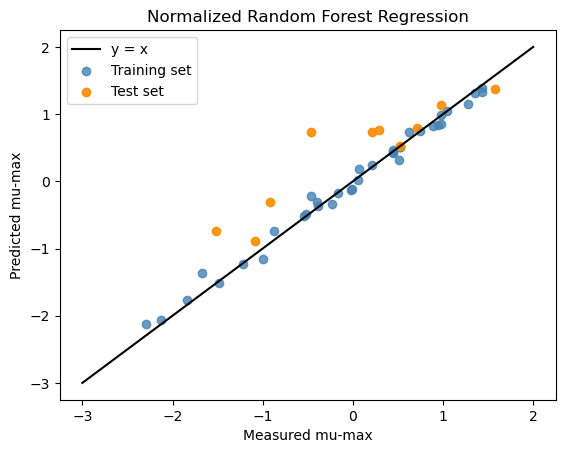

In [162]:
fig, NormparityPlot = plt.subplots()

# Plot a diagonal line
NormparityPlot.plot(np.linspace(-3, 2, 10), np.linspace(-3, 2, 10), color='black', label='y = x')

# Scatter plot for training set predictions
NormparityPlot.scatter(x=y_trainNorm,
                   y=y_predTrainNorm,
                   color='steelblue', alpha=0.8
                   ,label='Training set')

# Scatter plot for test set predictions
NormparityPlot.scatter(x=y_testNorm,
                   y=y_predTestNorm,
                   color='darkorange', alpha=0.9
                   ,label='Test set')
                

# Graph labels
NormparityPlot.set_title('Normalized Random Forest Regression')
NormparityPlot.set_xlabel('Measured mu-max')
NormparityPlot.set_ylabel('Predicted mu-max')
NormparityPlot.legend()

fig.savefig('Normalized_parity_plot.png')
plt.show()